## **Background**

*The New York City Taxi and Limousine Commission (TLC) adalah badan yang bertanggung jawab untuk mengatur taxi, kendaraan sewaan, mobil komuter, dan kendaraan paratransit di kota New York.*

## **Dataset Explanation**

*Dataset yang digunakan adalah data yang dikumpulkan oleh TLC untuk setiap trip yang diselesaikan oleh para pengemudi yang berlisensi. Data dicatat oleh Technology Service Providers (TSP) yang juga menyediakan argo elektrik pada setiap taxi, kendaraan sewaan, mobil komuter, dan kendaraan paratransit. Satu baris pada dataset mewakili 1 trip.*

## **Variable Explanation**

- VendorID A code indicating the LPEP provider that provided the record.
    - 1 = Creative Mobile Technologies, LLC.
    - 2 = VeriFone Inc.

- lpep_pickup_datetime The date and time when the meter was engaged.

- lpep_dropoff_datetime The date and time when the meter was disengaged.

- Passenger_count The number of passengers in the vehicle. This is a driver-entered value. Trip_distance The elapsed trip distance in miles was reported by the taximeter.

- PULocationID TLC Taxi Zone in which the taximeter was engaged.

- DOLocationID TLC Taxi Zone in which the taximeter was disengaged.

- RateCodeID The final rate code is in effect at the end of the trip.
    - 1 = Standard rate
    - 2 =JFK
    - 3 =Newark
    - 4 =Nassau or Westchester
    - 5 =Negotiated fare
    - 6 =Group ride

- Store_and_fwd_flag This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
    - Y = store and forward trip
    - N = not a store and forward trip

- Payment_type A numeric code signifying how the passenger paid for the trip.

    - 1 = Credit card
    - 2 = Cash
    - 3 = No charge
    - 4 = Dispute
    - 5 = Unknown
    - 6 = Voided trip

- Fare_amount The time-and-distance fare is calculated by the meter. Extra Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.

- MTA_tax $0.50 MTA tax that is automatically triggered based on the metered rate in use.

- Improvement_surcharge $0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015.

- Tip_amount This field is automatically populated for credit card tips. Cash tips are not included.

- Tolls_amount The total amount of all tolls paid in the trip.

- Total_amount The total amount charged to passengers. Does not include cash tips.

- Trip_type A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.
    - 1 = Street-hail
    - 2 = Dispatch

## **Problem**

Sebagai COO di Perusahaan Kartu Kredit 'Misa', tim kami ingin meningkatkan jumlah penggunaan Kartu Kredit 'Misa'. Berdasarkan dari dataset **NYC TLC Trip Record Dataset** kami ingin mengetahui apakah metode pembayaran kartu kredit jumlahnya lebih banyak dari metode pembayaran lainnya. Kami juga ingin mengetahui pada rentan waktu kapan traffic penggunaan taxi sedang paling tinggi. 

Selain itu, kami ingin mengadakan program promosi khusus pada tipe trip tertentu. Agar promosi kami tepat sasaran, kami perlu mengetahui tipe trip apa yang jumlahnya paling banyak. Sehingga kami bisa mengaplikasikan program promosi kami pada tipe trip tersebut.


## **Load Library**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import warnings
warnings.filterwarnings('ignore')

## **Load Dataset from Saved CSV**

In [45]:
nyc = pd.read_csv('NYC TLC Trip Record.csv')
nyc

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


## **Data Cleaning**

### **Drop Duplicate Row**

In [46]:
nyc = nyc.drop_duplicates()

### **Handling Null Value**

In [47]:
nyc.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

#### *Check Missing Value di Kolom yang Memiliki Jumlah Missing Value sebanyak 4324*

In [48]:
nyc[nyc[['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type','congestion_surcharge']].isna().any(axis=1)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,NaN,1.0,44.44,NaN,NaN,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,NaN,1.0,18.66,NaN,NaN,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,NaN,1.0,39.76,NaN,NaN,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,NaN,1.0,18.85,NaN,NaN,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,NaN,1.0,28.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


#### *Drop 4324 ROW yang memiliki missing value di kolom 'store_and_fwd_flag' 'RatecodeID' 'passenger_count' 'payment_type''congestion_surcharge' karena row tersebut memiiliki missing value di 5 kolom tersebut* 

In [49]:
nyc.dropna(subset=['payment_type'],inplace=True)

#### *Drop kolom ehail_fee karena memiliki null value di semua baris*

In [50]:
nyc.drop('ehail_fee', inplace=True, axis=1)

#### *Check sisa missing value*

In [51]:
nyc.isna().sum()

VendorID                  0
lpep_pickup_datetime      0
lpep_dropoff_datetime     0
store_and_fwd_flag        0
RatecodeID                0
PULocationID              0
DOLocationID              0
passenger_count           0
trip_distance             0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
payment_type              0
trip_type                10
congestion_surcharge      0
dtype: int64

##### *Ignore 10 missing value for now*

In [52]:
nyc

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


### **Check Anomaly**

#### *Check Kolom VendorID*

In [53]:
nyc['VendorID'].value_counts() #No anomaly

2    54672
1     9215
Name: VendorID, dtype: int64

#### *Check Kolom store_and_fwd_flag*

In [54]:
nyc['store_and_fwd_flag'].value_counts()

N    63579
Y      308
Name: store_and_fwd_flag, dtype: int64

#### *Check Kolom RatecodeID*

In [55]:
nyc['RatecodeID'].value_counts()

1.0     62103
5.0      1529
2.0       158
4.0        57
3.0        30
99.0       10
Name: RatecodeID, dtype: int64

##### *Drop row dengan RatecodeID yang memiliki anomaly value (99)*

In [56]:
nyc = nyc[nyc['RatecodeID'] != 99.0]
#Check if row drop successful
nyc['RatecodeID'].value_counts()

1.0    62103
5.0     1529
2.0      158
4.0       57
3.0       30
Name: RatecodeID, dtype: int64

##### *10 row yang di drop diatas adalah row dengan sisa 10 missing value yang belum di drop pada bagian handling missing value*

##### *Check sisa missing value*

In [57]:
nyc.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

##### *Missing value sudah tidak ada*

#### *Check Kolom passenger_count*

In [58]:
nyc['passenger_count'].value_counts().to_frame().reset_index().sort_values(by='index')

,index,passenger_count
6,0.0,336
0,1.0,54289
1,2.0,5096
4,3.0,958
5,4.0,364
2,5.0,1772
3,6.0,1054
7,7.0,4
9,8.0,2
8,9.0,2


##### *Drop row yang memiliki value passenger_count == 0*

In [59]:
nyc = nyc[nyc['passenger_count'] > 0]
#Check if row drop successful
nyc['passenger_count'].value_counts().to_frame().reset_index().sort_values(by='index')

,index,passenger_count
0,1.0,54289
1,2.0,5096
4,3.0,958
5,4.0,364
2,5.0,1772
3,6.0,1054
6,7.0,4
8,8.0,2
7,9.0,2


#### *Check anomaly pada kolom trip_distance <= 0 (0 atau negatif)*

In [60]:
nyc['trip_distance'].value_counts().to_frame().reset_index().sort_values(by='index')


,index,trip_distance
0,0.00,3159
233,0.01,86
284,0.02,63
369,0.03,45
363,0.04,46
...,...,...
1657,48.70,1
1492,53.72,1
1465,57.09,1
1577,66.18,1


##### *Drop row yang memiliki value trip_distance = 0*

In [61]:
nyc = nyc[nyc['trip_distance'] > 0]
#Check if row drop successful
nyc['trip_distance'].value_counts().to_frame().reset_index().sort_values(by='index')

,index,trip_distance
232,0.01,86
284,0.02,63
363,0.03,45
362,0.04,46
370,0.05,44
...,...,...
1640,48.70,1
1468,53.72,1
1387,57.09,1
1621,66.18,1


#### *Check anomaly pada kolom fare_amount <= 0 (0 atau negatif)*

In [62]:
nyc['fare_amount'].value_counts().to_frame().reset_index().sort_values(by='index')

,index,fare_amount
362,-70.0,1
347,-20.0,1
287,-15.0,1
260,-14.2,1
315,-13.0,1
...,...,...
305,348.1,1
257,399.0,1
266,425.0,1
374,440.0,1


##### *Drop row yang memiliki value fare_amount <= 0 (0 atau negatif)*

In [63]:
nyc = nyc[nyc['fare_amount'] > 0]
#Check if row drop successful
nyc['fare_amount'].value_counts().to_frame().reset_index().sort_values(by='index')

,index,fare_amount
187,0.01,3
331,0.05,1
206,0.15,2
325,0.30,1
227,0.45,1
...,...,...
290,348.10,1
280,399.00,1
250,425.00,1
353,440.00,1


#### *Check Kolom extra*

In [64]:
nyc['extra'].value_counts()
#No anomaly

0.00     33580
2.50     11848
1.00     10815
2.75      1523
5.00       803
0.50       591
5.25       470
7.50       280
3.75       220
6.00        79
3.25        51
5.50         1
12.50        1
Name: extra, dtype: int64

#### *Check Kolom mta_tax*

In [65]:
nyc['mta_tax'].value_counts()
#No anomaly

0.5    51971
1.5     7334
0.0      941
1.0       16
Name: mta_tax, dtype: int64

#### *Check anomaly pada kolom tip_amount < 0 (negatif)*

In [66]:
nyc['tip_amount'].value_counts().to_frame().reset_index().sort_values(by='index')
#No anomaly

,index,tip_amount
0,0.00,25602
37,0.01,150
190,0.02,41
357,0.03,17
519,0.04,9
...,...,...
999,77.88,1
1207,79.00,1
940,80.00,2
977,80.88,1


#### *Check anomaly pada kolom tolls_amount < 0 (negatif)*

In [67]:
nyc['tolls_amount'].value_counts().to_frame().reset_index().sort_values(by='index')

,index,tolls_amount
0,0.00,59072
4,2.45,8
2,3.00,71
11,5.09,1
14,6.25,1
1,6.55,1066
21,6.75,1
20,7.00,1
12,8.00,1
13,8.55,1


#### *Check kolom improvement_surcharge*

In [68]:
nyc['improvement_surcharge'].value_counts()
#No anomaly

1.0    56446
0.3     3752
0.0       64
Name: improvement_surcharge, dtype: int64

#### *Check kolom total_amount*

In [69]:
nyc['total_amount'].value_counts().to_frame().reset_index().sort_values(by='index')
#No anomaly

,index,total_amount
2050,1.01,2
2592,1.15,1
3222,1.30,1
2439,1.38,1
3118,1.45,1
...,...,...
2882,349.60,1
2684,400.00,1
2449,426.00,1
3026,441.00,1


#### *Check kolom payment_type*

In [70]:
nyc['payment_type'].value_counts()
#No anomaly

1.0    38235
2.0    21760
3.0      219
4.0       48
Name: payment_type, dtype: int64

##### *Membuat kolom baru dengan nama 'Payment Type' dan menggabungkan payment_type selain 1 dan 2 menjadi 'Other'*

In [71]:
def otherPayment(value):
    if value in [1]:
        return 'Credit Card'
    elif value in [2]:
        return 'Cash'
    else:
        return 'Other'

nyc['Payment Type'] = nyc['payment_type'].apply(otherPayment)

#### *Check kolom trip_type*

In [72]:
nyc['trip_type'].value_counts()
#No anomaly

1.0    59426
2.0      836
Name: trip_type, dtype: int64

#### *Check kolom congestion_surcharge*

In [73]:
nyc['congestion_surcharge'].value_counts()
#No anomaly

0.00    43604
2.75    16642
2.50       16
Name: congestion_surcharge, dtype: int64

#### *Check jumlah row setelah check anomaly*

In [74]:
len(nyc.index)

60262

### **Clear Outlier**

#### *Clear outlier in trip_distance column*

In [75]:
IQR_distance = nyc['trip_distance'].quantile(0.75) - nyc['trip_distance'].quantile(0.25)
lower_bound_distance = nyc['trip_distance'].quantile(0.25) - (IQR_distance*1.5)
upper_bound_distance = nyc['trip_distance'].quantile(0.75) + (IQR_distance*1.5) 

nyc = nyc[(nyc['trip_distance'] < upper_bound_distance) & (nyc['trip_distance'] > lower_bound_distance)]

#### *Reset index dataframe setelah dilakukan cleaning*

In [76]:
nyc.reset_index(drop=True)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Payment Type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Credit Card
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Credit Card
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Credit Card
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Credit Card
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55180,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,Credit Card
55181,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,Credit Card
55182,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,Credit Card
55183,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,Credit Card


## **Data Analysis**

#### *Melihat Distribusi Metode Pembayaran*

In [77]:
payment = nyc.groupby(['Payment Type'])[['fare_amount']].count()
payment.rename(columns={'fare_amount': 'Jumlah Trip'}, inplace=True)
payment

,Jumlah Trip
Payment Type,
Cash,19903
Credit Card,35025
Other,257


#### *Plot Distribusi Metode Pembayaran*

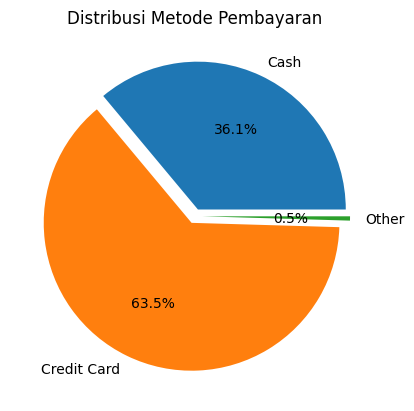

In [78]:
plt.pie(payment['Jumlah Trip'],labels=['Cash','Credit Card','Other'],autopct='%.1f%%',explode=[0.05,0.05,0.05])
plt.title('Distribusi Metode Pembayaran')
plt.show()

Chart diatas menunjukkan bahwa jumlah metode pembayaran menggunakan kartu kredit jumlahnya jauh lebih banyak dari metode lainnya. Jumlah pengguna kartu kredit hampir 2 kali lipat dari metode pembayaran cash.

#### *Membuat Kolom 'Time' yang Berisi Waktu Trip Dimulai*

In [79]:
nyc['lpep_pickup_datetime'] = pd.to_datetime(nyc['lpep_pickup_datetime'])

nyc['TIME'] = nyc['lpep_pickup_datetime'].dt.strftime('%X')
nyc['TIME'] = nyc['TIME'].str.slice(0,2)

#### *Binning Kolom Time Menjadi Time Range*

In [80]:
def TimeRange(value):
    if value in ['00','01','02']:
        return '00:00 - 03:00'
    elif value in ['03','04','05']:
        return '03:00 - 06:00'
    elif value in ['06','07','08']:
        return '06:00 - 09:00'
    elif value in ['09','10','11']:
        return '09:00 - 12:00'
    elif value in ['12','13','14']:
        return '12:00 - 15:00'
    elif value in ['15','16','17']:
        return '15:00 - 18:00'
    elif value in ['18','19','20']:
        return '18:00 - 21:00'
    elif value in ['21','22','23']:
        return '21:00 - 24:00'

nyc['Time Range'] = nyc['TIME'].apply(TimeRange)

#### *Melihat Jumlah Trip Berdasarkan Time Range*

In [81]:
count_time_group = nyc.groupby(['Time Range'])[['fare_amount']].count()
count_time_group.rename(columns={'fare_amount': 'Jumlah Trip'}, inplace=True)
count_time_group

,Jumlah Trip
Time Range,
00:00 - 03:00,1946
03:00 - 06:00,952
06:00 - 09:00,5347
09:00 - 12:00,8529
12:00 - 15:00,9709
15:00 - 18:00,13104
18:00 - 21:00,10865
21:00 - 24:00,4733


#### *Plot Jumlah Trip Berdasarkan Time Range*

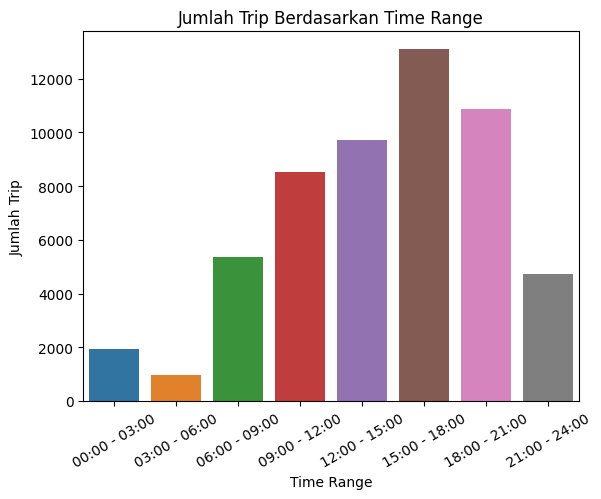

In [82]:
plot_count_time_group = sns.barplot(x=count_time_group.index, y=count_time_group['Jumlah Trip'])
plot_count_time_group.set(ylabel='Jumlah Trip')
plt.xticks(rotation=30)
plt.title('Jumlah Trip Berdasarkan Time Range')
plt.show()

Grafik diatas menunjukkan bahwa jumlah trip mulai naik dari jam 6 pagi dan mencapai puncaknya pada interval jam 3 sampai 6 sore. Jumlah trip mulai turun saat setelah jam 6 sore dan turun drastis pada jam 9 malam.

#### *Membagi Jarak Trip Menjadi 5 Kategori*

In [83]:
pd.cut(nyc.trip_distance, bins=5, right=True).head()

0      (2.446, 3.664]
1      (1.228, 2.446]
3      (1.228, 2.446]
4    (0.00391, 1.228]
5      (2.446, 3.664]
Name: trip_distance, dtype: category
Categories (5, interval[float64, right]): [(0.00391, 1.228] < (1.228, 2.446] < (2.446, 3.664] < (3.664, 4.882] < (4.882, 6.1]]

In [84]:
nyc['trip_distance'].describe()

count    55185.000000
mean         2.072148
std          1.271924
min          0.010000
25%          1.150000
50%          1.740000
75%          2.700000
max          6.100000
Name: trip_distance, dtype: float64

In [85]:
nyc['distance_category'] = pd.cut(nyc.trip_distance, bins=5, labels=['Very Short Trip','Short Trip','Medium Trip','Long Trip','Very Long Trip'])
def cat_distance_value(value):
    if value in ['Very Short Trip']:
        return '0.01 - 1.228'
    elif value in ['Short Trip']:
        return '1.228 - 2.446'
    elif value in ['Medium Trip']:
        return '2.446 - 3.664'
    elif value in ['Long Trip']:
        return '3.664 - 4.882'
    elif value in ['Very Long Trip']:
        return '4.882 - 6.1'
nyc['Distance Category Value'] = nyc['distance_category'].apply(cat_distance_value)
cat_dist = nyc.copy()
cat_dist[['distance_category','Distance Category Value']].drop_duplicates(subset=['distance_category']).sort_values(by='distance_category').reset_index(drop=True)

,distance_category,Distance Category Value
0,Very Short Trip,0.01 - 1.228
1,Short Trip,1.228 - 2.446
2,Medium Trip,2.446 - 3.664
3,Long Trip,3.664 - 4.882
4,Very Long Trip,4.882 - 6.1


#### *Plot Pembagian 5 Kategori Jarak Trip*

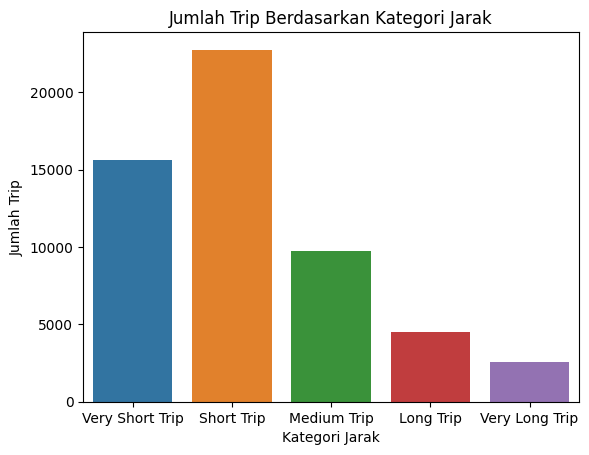

In [86]:
cat_distance = nyc.groupby(['distance_category'])[['distance_category']].count()
jumlah_trip = sns.barplot(x=cat_distance.index, y=cat_distance['distance_category'])
jumlah_trip.set(xlabel='Kategori Jarak')
jumlah_trip.set(ylabel='Jumlah Trip')
plt.title('Jumlah Trip Berdasarkan Kategori Jarak')
plt.show()

Grafik diatas menunjukkan bahwa kebanyakan trip berada di kategori jarak Short Trip. Kategori jarak Short Trip adalah interval 1.228 - 2.446 mil. 

## **Kesimpulan**

1. Metode pembayaran kartu kredit memiliki jumlah yang lebih banyak dibandingkan metode pembayaran cash
2. Jumlah trip dalam 1 hari paling banyak berada di interval jam 15.00 sampai 18.00
3. Jarak trip pada metode pembayaran kartu kredit paling banyak berada di interval 1.228 sampai 2.446 mil (short trip)


## **Rekomendasi**

1. Memberikan promo khusus apabila menggunakan metode pembayaran kartu kredit 'Misa'
2. Melakukan promo dilakukan di interval jam tertentu. Disarankan dilakukan pada rentang waktu dimana jumlah trip sedang tinggi.
3. Melakukan promo khusus pada tipe trip dengan jumlah terbanyak, yaitu Short Trip. Karena di tipe trip tersebut memiliki potensi untuk menggaet pengguna kartu kredit 'Misa'.